In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from scipy.stats import zscore 
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans 



In [2]:
df_bank=pd.read_csv('Qualitative_Bankruptcy.data.txt')

In [3]:
df_bank.head(10)

,P,P.1,A,A.1,A.2,P.2,NB
0,N,N,A,A,A,N,NB
1,A,A,A,A,A,A,NB
2,P,P,P,P,P,P,NB
3,N,N,P,P,P,N,NB
4,A,A,P,P,P,A,NB
5,P,P,A,P,P,P,NB
6,P,P,P,A,A,P,NB
7,P,P,A,P,A,P,NB
8,P,P,A,A,P,P,NB
9,P,P,P,P,A,P,NB


In [4]:
df_bank.shape

(249, 7)

In [5]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
P      249 non-null object
P.1    249 non-null object
A      249 non-null object
A.1    249 non-null object
A.2    249 non-null object
P.2    249 non-null object
NB     249 non-null object
dtypes: object(7)
memory usage: 13.7+ KB


In [6]:
df_bank['NB'].value_counts()

NB    142
B     107
Name: NB, dtype: int64

this column is target column having 2 unique value NB and B are 142 and 107 respectively 

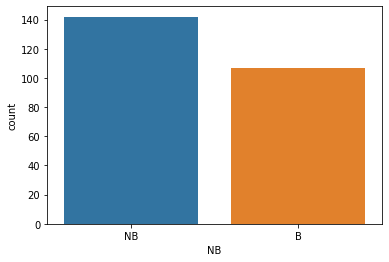

In [7]:
sns.countplot(x='NB',data=df_bank)

In [8]:
df_bank_new=pd.get_dummies(df_bank,columns=['P','P.1','A','A.1','A.2','P.2'],prefix='new')

In [9]:
df_bank_new=pd.DataFrame(df_bank_new)

In [10]:
df_bank_new.head()

,NB,new_A,new_N,new_P,new_A,new_N,new_P,new_A,new_N,new_P,new_A,new_N,new_P,new_A,new_N,new_P,new_A,new_N,new_P
0,NB,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
1,NB,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,NB,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
3,NB,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
4,NB,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0


In [11]:
df_bank_new.shape

(249, 19)

In [12]:
X=df_bank_new.drop('NB',axis=1)

In [13]:
y=df_bank.pop("NB")

In [14]:
X.shape

(249, 18)

In [15]:
y.shape

(249,)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=.20, random_state=0)

In [18]:
sc=StandardScaler()
X_train_std= sc.fit_transform(X_train)

In [19]:
train_cov_matrix=np.cov(X_train_std.T)
print('covariance_matrix \n%s',train_cov_matrix)

covariance_matrix 
%s [[ 1.00505051e+00 -5.25827429e-01 -4.54840375e-01  2.09385713e-01
  -1.99692858e-01  1.72885579e-02  2.35338233e-02  5.11091794e-02
  -8.61828109e-02 -1.18857693e-04 -8.25626240e-02  8.67320485e-02
   1.59777815e-02 -7.86025439e-02  6.64444189e-02  2.40237451e-01
  -1.94440292e-01 -1.08457536e-02]
 [-5.25827429e-01  1.00505051e+00 -5.25827429e-01 -2.82329391e-01
   3.39998758e-01 -1.07209329e-01 -2.23773254e-02  1.11343912e-01
  -1.07209329e-01 -2.23773254e-02  5.05545097e-02 -3.07580775e-02
  -8.11840221e-02  2.56107705e-01 -1.91691731e-01 -1.75091085e-02
   1.42223719e-01 -1.41501374e-01]
 [-4.54840375e-01 -5.25827429e-01  1.00505051e+00  8.60353373e-02
  -1.56071696e-01  9.48920845e-02 -1.18857693e-04 -1.67616126e-01
   1.98363453e-01  2.35338233e-02  2.96638936e-02 -5.45477140e-02
   6.89707567e-02 -1.89380917e-01  1.34136088e-01 -2.21916443e-01
   4.56216365e-02  1.58908569e-01]
 [ 2.09385713e-01 -2.82329391e-01  8.60353373e-02  1.00505051e+00
  -6.08599787e-

In [20]:
eig_values, eig_vectors=np.linalg.eig(train_cov_matrix)
print('eigen_vactors \n%s',eig_vectors)
print('eigen_values \n%s',eig_values)

eigen_vactors 
%s [[-5.89119510e-02  4.23040652e-01  2.38214727e-01 -4.81408156e-02
  -3.18423897e-02  9.25742128e-02 -1.80255456e-01 -9.91080765e-02
   4.12593764e-01 -3.35030300e-01 -3.11957267e-01  6.07813452e-02
   4.35670992e-02 -5.55912604e-01 -2.13171810e-02  2.36313191e-02
   7.25655006e-02 -2.34870243e-02]
 [ 1.53136977e-01 -3.31431022e-01  2.28226055e-01  3.08613447e-01
   1.23219592e-01  4.51120545e-02  1.91914941e-01  1.41997237e-01
  -6.63737664e-03  4.49995824e-02  4.68174183e-01 -2.64822128e-01
   4.55873126e-02 -5.81690360e-01 -2.23056621e-02  2.47271071e-02
   7.59303745e-02 -2.45761214e-02]
 [-1.01326012e-01 -7.62411209e-02 -4.77023660e-01 -2.74783086e-01
  -9.70909139e-02 -1.39778120e-01 -2.05586124e-02 -4.94735947e-02
  -4.05648611e-01  2.87944080e-01 -1.77926228e-01  2.16320627e-01
   4.35670992e-02 -5.55912604e-01 -2.13171810e-02  2.36313191e-02
   7.25655006e-02 -2.34870243e-02]
 [-8.80777616e-02  4.60083694e-01 -1.64130045e-01 -1.81298236e-02
   8.95636039e-03 -

In [21]:
train_eig_pairs= [(eig_values[index], eig_vectors[:,index]) for index in range(len(eig_values))]
train_eig_pairs.sort(reverse=True)
train_eig_pairs

[(4.591528782567251,
  array([-0.05891195,  0.15313698, -0.10132601, -0.08807776,  0.25345555,
         -0.20824995, -0.23024671,  0.39245616, -0.21233338, -0.14069826,
          0.38074833, -0.25936311, -0.18528752,  0.43263291, -0.28281689,
          0.00846431,  0.16218798, -0.18821793])),
 (2.1934421306416865,
  array([ 0.42304065, -0.33143102, -0.07624112,  0.46008369, -0.26264696,
         -0.17091618, -0.14977255,  0.15077033, -0.01451125, -0.09450147,
          0.10612605, -0.0172556 , -0.25368846,  0.0394394 ,  0.17587006,
          0.39071025, -0.27619109, -0.06212804])),
 (1.921660914577861,
  array([ 0.23821473,  0.22822605, -0.47702366, -0.16413004,  0.17929563,
         -0.04054988,  0.27876883,  0.03486163, -0.34610614, -0.13129865,
         -0.11866092,  0.25519318,  0.26434704, -0.01901565, -0.20574675,
          0.28181218, -0.32626293,  0.0963676 ])),
 (1.7942445409777892,
  array([-0.04814082,  0.30861345, -0.27478309, -0.01812982,  0.23353415,
         -0.25796673,

In [22]:
train_eig_values_sorted = [train_eig_pairs[index][0] for index in range(len(eig_values))]
train_eig_vectors_sorted = [train_eig_pairs[index][1] for index in range(len(eig_values))]
print('Eigenvalues in descending order: \n%s' ,train_eig_values_sorted)

Eigenvalues in descending order: 
%s [4.591528782567251, 2.1934421306416865, 1.921660914577861, 1.7942445409777892, 1.4384820055968932, 1.3502587293554957, 1.273955160440058, 1.0654777218055107, 0.936062004566692, 0.8482090576202266, 0.4565625491103726, 0.22102549364926974, 2.7029348834731122e-15, 1.7175066017323598e-15, 1.0259308948517505e-15, 5.09007517078571e-16, -1.2164241854683765e-15, -1.6097138425917216e-15]


In [23]:
tot = sum(eig_values)
var_explained = [(i / tot) for i in train_eig_values_sorted] 
cum_var_exp = np.cumsum(var_explained)

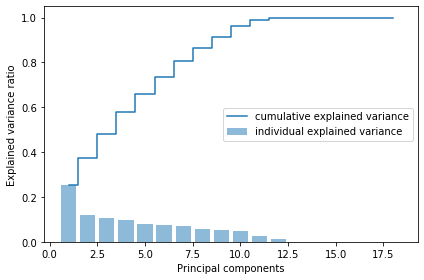

In [24]:
plt.bar(range(1, eig_values.size + 1), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, eig_values.size + 1),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [25]:
reduce_dimension=np.array(train_eig_vectors_sorted[0:10])

In [78]:
Proj_train_data = np.dot(X_train_std,reduce_dimension.T)

In [79]:
print(X_train_std.shape)
print(Proj_train_data.shape)


(199, 18)
(199, 10)


In [28]:
distortion = []
cluster_range = range( 2, 4) 
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
 clusters = KMeans( num_clusters, n_init = 5)
 clusters.fit(Proj_train_data)
 labels = clusters.labels_
 centroids = clusters.cluster_centers_ 
 cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:10]


,num_clusters,cluster_errors
0,2,2632.354801
1,3,2335.153795


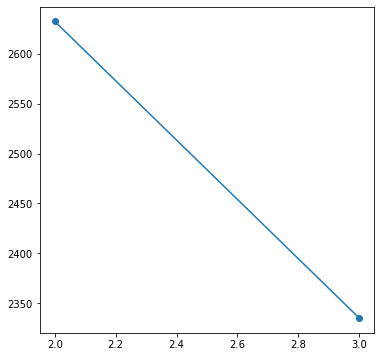

In [29]:

plt.figure(figsize=(6,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors,marker="o" )

In [30]:
kmeans=KMeans(n_clusters=2)

In [31]:
kmeans=kmeans.fit(Proj_train_data)

In [32]:
labels=kmeans.predict(Proj_train_data)

In [33]:
centroids = kmeans.cluster_centers_

In [34]:
print("Centroid values")
print(centroids)

Centroid values
[[-1.7130258  -0.08702997  0.01083823  0.19783823  0.02032809 -0.04229243
  -0.05818431 -0.06318575 -0.03759016 -0.03113457]
 [ 2.34521389  0.11914817 -0.01483805 -0.27084996 -0.02783013  0.05790035
   0.0796571   0.0865043   0.05146271  0.04262471]]


In [35]:
prediction= kmeans.predict(Proj_train_data)
X_df = pd.DataFrame(Proj_train_data)
X_df["cluster_Id"] = prediction  


X_df.head()


,0,1,2,3,4,5,6,7,8,9,cluster_Id
0,-0.422515,-2.791350,1.177257,1.389318,-2.065873,-1.013413,-0.408212,-0.009935,-0.800600,-0.088517,0
1,-2.266377,2.992740,1.574994,1.015065,0.696362,-1.641626,-0.358147,0.108871,0.139047,0.370809,0
2,1.832726,0.936506,0.139502,-1.560532,0.393499,0.652802,-0.598246,2.720047,-1.234494,-0.730818,1
3,-0.557495,-1.811064,0.109256,2.692348,-0.780462,-1.086600,-0.188503,0.967725,1.014572,-0.713872,0
4,-2.545864,0.979346,-2.679987,-0.056150,-0.725126,1.440427,-1.395321,1.075688,-0.261326,-1.097434,0


In [36]:
for i in cluster_range:
    points = np.array(X_df.loc[X_df['cluster_Id'] == i])
    
points

array([], shape=(0, 11), dtype=float64)

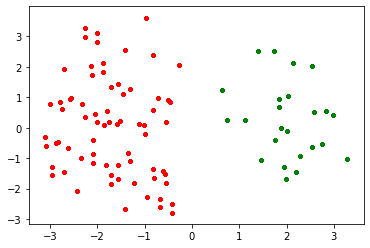

In [37]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
c = np.array([9,9])

for i in labels:
        points = np.array(X_df.loc[X_df['cluster_Id'] == i])
        
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

In [38]:
X_test_std= sc.fit_transform(X_test)

In [39]:
Proj_test_data = np.dot(X_test_std,reduce_dimension.T)

In [40]:
Proj_test_data.shape

(50, 10)

In [41]:
X_test_std.shape

(50, 18)

In [46]:
y=sc.fit_transform(X_test_std)

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(Proj_train_data, y_train)

result = model.score(Proj_test_data, y_test)
print(result)

1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
model.fit(X_train_std, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
model.score(X_test_std, y_test)

1.0

In [75]:
predict=model.predict(X_test)

In [76]:
from sklearn import metrics

In [77]:
print(metrics.confusion_matrix(y_test, predict))

[[23  0]
 [ 0 27]]
